NLP Project

Part B : News Article Classification

1. Data Collection and Preprocessing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_news.xlsx to data_news.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("data_news.xlsx")  # or use the exact uploaded filename
df.head()


,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [ ]:
df.drop(['links', 'keywords'], axis=1, inplace=True)

In [ ]:
df.head()

,category,headline,short_description
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,Resting is part of training. I've confirmed wh...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,Think of talking to yourself as a tool to coac...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,The clock is ticking for the United States to ...
3,WELLNESS,"Oh, What a Difference She Made","If you want to be busy, keep trying to be perf..."
4,WELLNESS,Green Superfoods,"First, the bad news: Soda bread, corned beef a..."


In [ ]:
# Initial Data Exploration

In [ ]:
print(df.shape)
print(df.columns)
df.info()
df.isnull().sum()
df['category'].value_counts()  # Check distribution of categories

(50000, 3)
Index(['category', 'headline', 'short_description'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   short_description  49994 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


In [ ]:
# Text Preprocessing
 # Lowercasing , Removing punctuation , Removing stopwords , tokenization ,Lemmatization/Stemming

In [ ]:
# 1. Import Required Libraries
import pandas as pd
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('punkt_tab')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:

df['text'] = df['headline'].astype(str) + " " + df['short_description'].astype(str)
df.dropna(subset=['text', 'category'], inplace=True)


In [ ]:
#Define Preprocessing Function

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)


In [ ]:
# Apply Preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)


In [ ]:
df[['category', 'text', 'clean_text']].head()


,category,text,clean_text
0,WELLNESS,143 Miles in 35 Days: Lessons Learned Resting ...,mile day lesson learned resting part training ...
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful? T...,talking crazy crazy helpful think talking tool...
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,crenezumab trial gauge whether alzheimers drug...
3,WELLNESS,"Oh, What a Difference She Made If you want to ...",oh difference made want busy keep trying perfe...
4,WELLNESS,"Green Superfoods First, the bad news: Soda bre...",green superfoods first bad news soda bread cor...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
#TF-IDF Vectorization

In [ ]:
tfidf = TfidfVectorizer(max_features=5000)  # You can increase or tune this
X = tfidf.fit_transform(df['clean_text']).toarray()
y = df['category']


In [ ]:
#Split into Train/Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the Model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)





LogisticRegression(max_iter=1000)

In [ ]:
#Predict and Evaluate

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.73      0.78      0.76       955
 ENTERTAINMENT       0.77      0.78      0.78       985
  FOOD & DRINK       0.85      0.82      0.84      1021
     PARENTING       0.78      0.76      0.77      1030
      POLITICS       0.80      0.74      0.77      1034
        SPORTS       0.87      0.89      0.88       995
STYLE & BEAUTY       0.86      0.85      0.86       986
        TRAVEL       0.82      0.81      0.81      1008
      WELLNESS       0.72      0.75      0.74      1009
    WORLD NEWS       0.79      0.81      0.80       977

      accuracy                           0.80     10000
     macro avg       0.80      0.80      0.80     10000
  weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
 [[749  19  12  20  52  14   2   9  43  35]
 [ 23 767  14  34  31  27  30  15  27  17]
 [ 20  11 839  19   5  17  19  37  45   9]
 [ 27  35  10 781  27  15  26  17  86   6

In [ ]:
# Bag of Words (BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['clean_text']).toarray()


In [ ]:
#Word2Vec (Word Embeddings)

In [ ]:
!pip install gensim
from gensim.models import Word2Vec


# Tokenize each cleaned sentence
tokenized = df['clean_text'].apply(nltk.word_tokenize)

# Train Word2Vec on your data
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2)

# Function to get average word vector per document
import numpy as np

def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv]
    return np.mean(w2v_model.wv[doc], axis=0) if len(doc) > 0 else np.zeros(100)

X_w2v = np.array([document_vector(doc) for doc in tokenized])


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0;

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

EDA on your category column:

Check Category Distribution (Counts)

Visualize Category Distribution using Bar Chart

/tmp/ipython-input-28-1292040021.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')


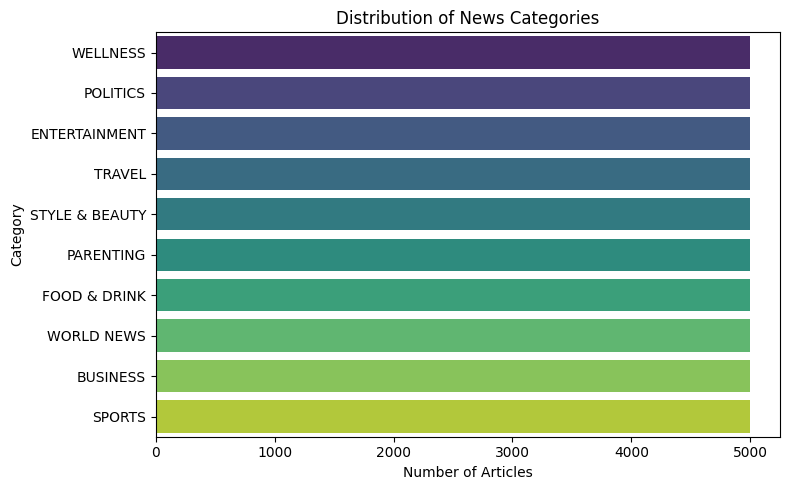

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, y='category', order=df['category'].value_counts().index, palette='viridis')
plt.title("Distribution of News Categories")
plt.xlabel("Number of Articles")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


naive bayes

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("🔹 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))


🔹 Naive Bayes Results
Accuracy: 0.7828
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.71      0.73      0.72       955
 ENTERTAINMENT       0.79      0.74      0.77       985
  FOOD & DRINK       0.83      0.85      0.84      1021
     PARENTING       0.69      0.74      0.71      1030
      POLITICS       0.80      0.72      0.76      1034
        SPORTS       0.87      0.86      0.86       995
STYLE & BEAUTY       0.85      0.84      0.85       986
        TRAVEL       0.80      0.81      0.80      1008
      WELLNESS       0.71      0.73      0.72      1009
    WORLD NEWS       0.79      0.81      0.80       977

      accuracy                           0.78     10000
     macro avg       0.78      0.78      0.78     10000
  weighted avg       0.78      0.78      0.78     10000



Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


🔹 SVM Results
Accuracy: 0.791
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.80      0.77       955
 ENTERTAINMENT       0.78      0.76      0.77       985
  FOOD & DRINK       0.83      0.83      0.83      1021
     PARENTING       0.76      0.75      0.75      1030
      POLITICS       0.78      0.73      0.75      1034
        SPORTS       0.87      0.91      0.89       995
STYLE & BEAUTY       0.84      0.86      0.85       986
        TRAVEL       0.81      0.78      0.80      1008
      WELLNESS       0.73      0.71      0.72      1009
    WORLD NEWS       0.77      0.80      0.78       977

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



In [ ]:
from sklearn.model_selection import cross_val_score


Cross-Validation[link text](https://)

In [ ]:
from sklearn.model_selection import cross_val_score

print("\n🔁 Cross-Validation (Logistic Regression):")
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())



🔁 Cross-Validation (Logistic Regression):
Cross-Validation Scores: [0.7817 0.7854 0.775  0.7832 0.7823]
Average Accuracy: 0.7815199999999999


In [ ]:
# Evaluate Models Using Key Metrics Accuracy , Precision, Recall, F1-score Confusion Matrix
# We'll evaluate: Logistic Regression (lr) ,Naive Bayes (nb) ,Support Vector Machine (svm)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Logistic Regression
y_pred_model = model.predict(X_test)
print("🔹 Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_model))
print("Classification Report:\n", classification_report(y_test, y_pred_model))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_model))

# Naive Bayes
y_pred_nb = nb.predict(X_test)
print("\n🔹 Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# SVM
y_pred_svm = svm.predict(X_test)
print("\n🔹 Support Vector Machine (SVM)")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


🔹 Logistic Regression
Accuracy: 0.7991
Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.73      0.78      0.76       955
 ENTERTAINMENT       0.77      0.78      0.78       985
  FOOD & DRINK       0.85      0.82      0.84      1021
     PARENTING       0.78      0.76      0.77      1030
      POLITICS       0.80      0.74      0.77      1034
        SPORTS       0.87      0.89      0.88       995
STYLE & BEAUTY       0.86      0.85      0.86       986
        TRAVEL       0.82      0.81      0.81      1008
      WELLNESS       0.72      0.75      0.74      1009
    WORLD NEWS       0.79      0.81      0.80       977

      accuracy                           0.80     10000
     macro avg       0.80      0.80      0.80     10000
  weighted avg       0.80      0.80      0.80     10000

Confusion Matrix:
 [[749  19  12  20  52  14   2   9  43  35]
 [ 23 767  14  34  31  27  30  15  27  17]
 [ 20  11 839  19   5  17  19  37  45   9]
 [

In [ ]:
def predict_category(text):
    cleaned = preprocess_text(text)
    vector = tfidf.transform([cleaned])
    prediction = model.predict(vector)
    return prediction[0]

# Example
user_input = input("Enter a news article snippet: ")
predicted_category = predict_category(user_input)
print(f"\n📢 Predicted Category: {predicted_category}")


Enter a news article snippet: Resting is part of training. 

📢 Predicted Category: WELLNESS


video explanation

In [ ]:
https://drive.google.com/file/d/1Ylp-b9yp_HS47smuJ5stPWpVqKZ9oQcS/view?usp=sharing

SyntaxError: invalid decimal literal (ipython-input-1-4065597268.py, line 1)